In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

Sub-Task 1:

Clean the data – you might have to address missing values, duplicates, data type conversions, transformations, and multicolinearity, as well as outliers.

Sub-Task 2:

Perform some exploratory data analysis. Look into the data types, data statistics, and identify any missing data or null values, and how often they appear in the data. Visualize specific parameters as well as variable distributions.

# IMPORT AND MERGE DATA

In [119]:
data_targets = pd.read_csv('C:/Users/Admin/Downloads/ml_case_training_output.csv', index_col = 0)
data = pd.read_csv('C:/Users/Admin/Downloads/ml_case_training_data.csv', index_col = 0)
hist_data = pd.read_csv('C:/Users/Admin/Downloads/ml_case_training_hist_data.csv', index_col = 0)

In [120]:
data_targets.head()

,churn
id,
48ada52261e7cf58715202705a0451c9,0
24011ae4ebbe3035111d65fa7c15bc57,1
d29c2c54acc38ff3c0614d0a653813dd,0
764c75f661154dac3a6c254cd082ea7d,0
bba03439a292a1e166f80264c16191cb,0


In [121]:
data.head()

,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
id,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [122]:
#Merge data

train = pd.merge(data_targets ,data ,on=['id'])

In [123]:
train.reset_index(inplace=True)

In [124]:
#DESCRIBE DATA
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   churn                     16096 non-null  int64  
 2   activity_new              6551 non-null   object 
 3   campaign_disc_ele         0 non-null      float64
 4   channel_sales             11878 non-null  object 
 5   cons_12m                  16096 non-null  int64  
 6   cons_gas_12m              16096 non-null  int64  
 7   cons_last_month           16096 non-null  int64  
 8   date_activ                16096 non-null  object 
 9   date_end                  16094 non-null  object 
 10  date_first_activ          3508 non-null   object 
 11  date_modif_prod           15939 non-null  object 
 12  date_renewal              16056 non-null  object 
 13  forecast_base_bill_ele    3508 non-null   float64
 14  foreca

# DATA DESCRIPTION AND MISSING VALUE

In [8]:
train.shape

(16096, 33)

In [9]:
cat_cols = train.select_dtypes('object').columns
num_cols = train.select_dtypes(['int64','float64']).columns
print('total {} categories: {}'.format(len(cat_cols), cat_cols))
print('total {} numeric: {} '.format(len(num_cols), num_cols))

total 10 categories: Index(['id', 'activity_new', 'channel_sales', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal', 'has_gas',
       'origin_up'],
      dtype='object')
total 23 numeric: Index(['churn', 'campaign_disc_ele', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max'],
      dtype='object') 


After merging data label and input, there are total 10 categories and 23 numerics variables, with 16096 rows in the data


In [10]:
train.describe()

,churn,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,16096.000000,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,0.099093,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,0.298796,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,0.000000,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,0.000000,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,0.000000,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,0.000000,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,1.000000,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


The minimum consumption and forecasts for electricity and gas (yearly and monthly) are negative. We will consider it
as corrupted data.
The campaign_disc_ele (code of the electricity campaign the customer last subscribed to) is an empty column. We verify it by running
train["campaign_disc_ele"].isnull().values.all()

In [11]:
hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Min value of fix price column is negative
this might be corruped data and we will change
them to positive when cleaning the data.

In [12]:
#calculate missing data
def calculateAndPlotMissingData(data):
    total_data = len(data)
    total_miss = data.isnull().sum()
    percent_missing = total_miss*100/total_data
    missing_data = pd.concat(
      (total_miss,percent_missing),
      axis = 1,
      keys =['Missing value','Percentage missing value']).sort_values('Percentage missing value',ascending = True)
    missing_data = missing_data[missing_data['Percentage missing value'] != 0]
    return missing_data

In [13]:
missing_data = calculateAndPlotMissingData(train)
missing_data

,Missing value,Percentage missing value
date_end,2,0.012425
pow_max,3,0.018638
margin_net_pow_ele,13,0.080765
margin_gross_pow_ele,13,0.080765
net_margin,15,0.093191
date_renewal,40,0.248509
origin_up,87,0.540507
forecast_price_pow_p1,126,0.782803
forecast_discount_energy,126,0.782803
forecast_price_energy_p1,126,0.782803


Text(0.5, 0, 'Percentage')

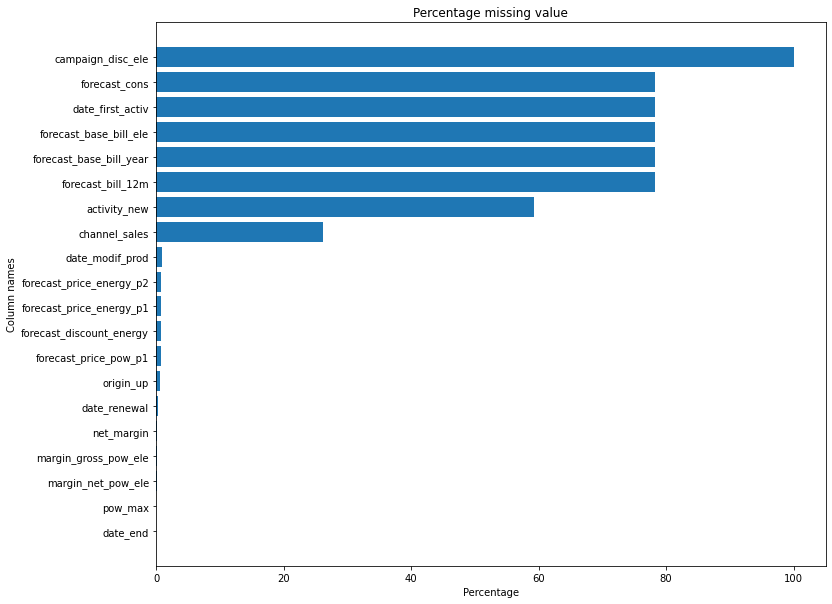

In [14]:
plt.figure(figsize = (12,10))
plt.barh(y = missing_data.index,
          width = missing_data['Percentage missing value'])
plt.title('Percentage missing value')
plt.ylabel('Column names')
plt.xlabel('Percentage')

Most of columns have high percentage of missing value ( forecast bill and consumption, date of first activities , we will remove those having missing percentage > 60%)

In [15]:
missing_data_history = calculateAndPlotMissingData(hist_data)
missing_data_history

,Missing value,Percentage missing value
price_p1_var,1359,0.704138
price_p2_var,1359,0.704138
price_p3_var,1359,0.704138
price_p1_fix,1359,0.704138
price_p2_fix,1359,0.704138
price_p3_fix,1359,0.704138


In this case the missing data is very small

# DATA VISUALIZATION


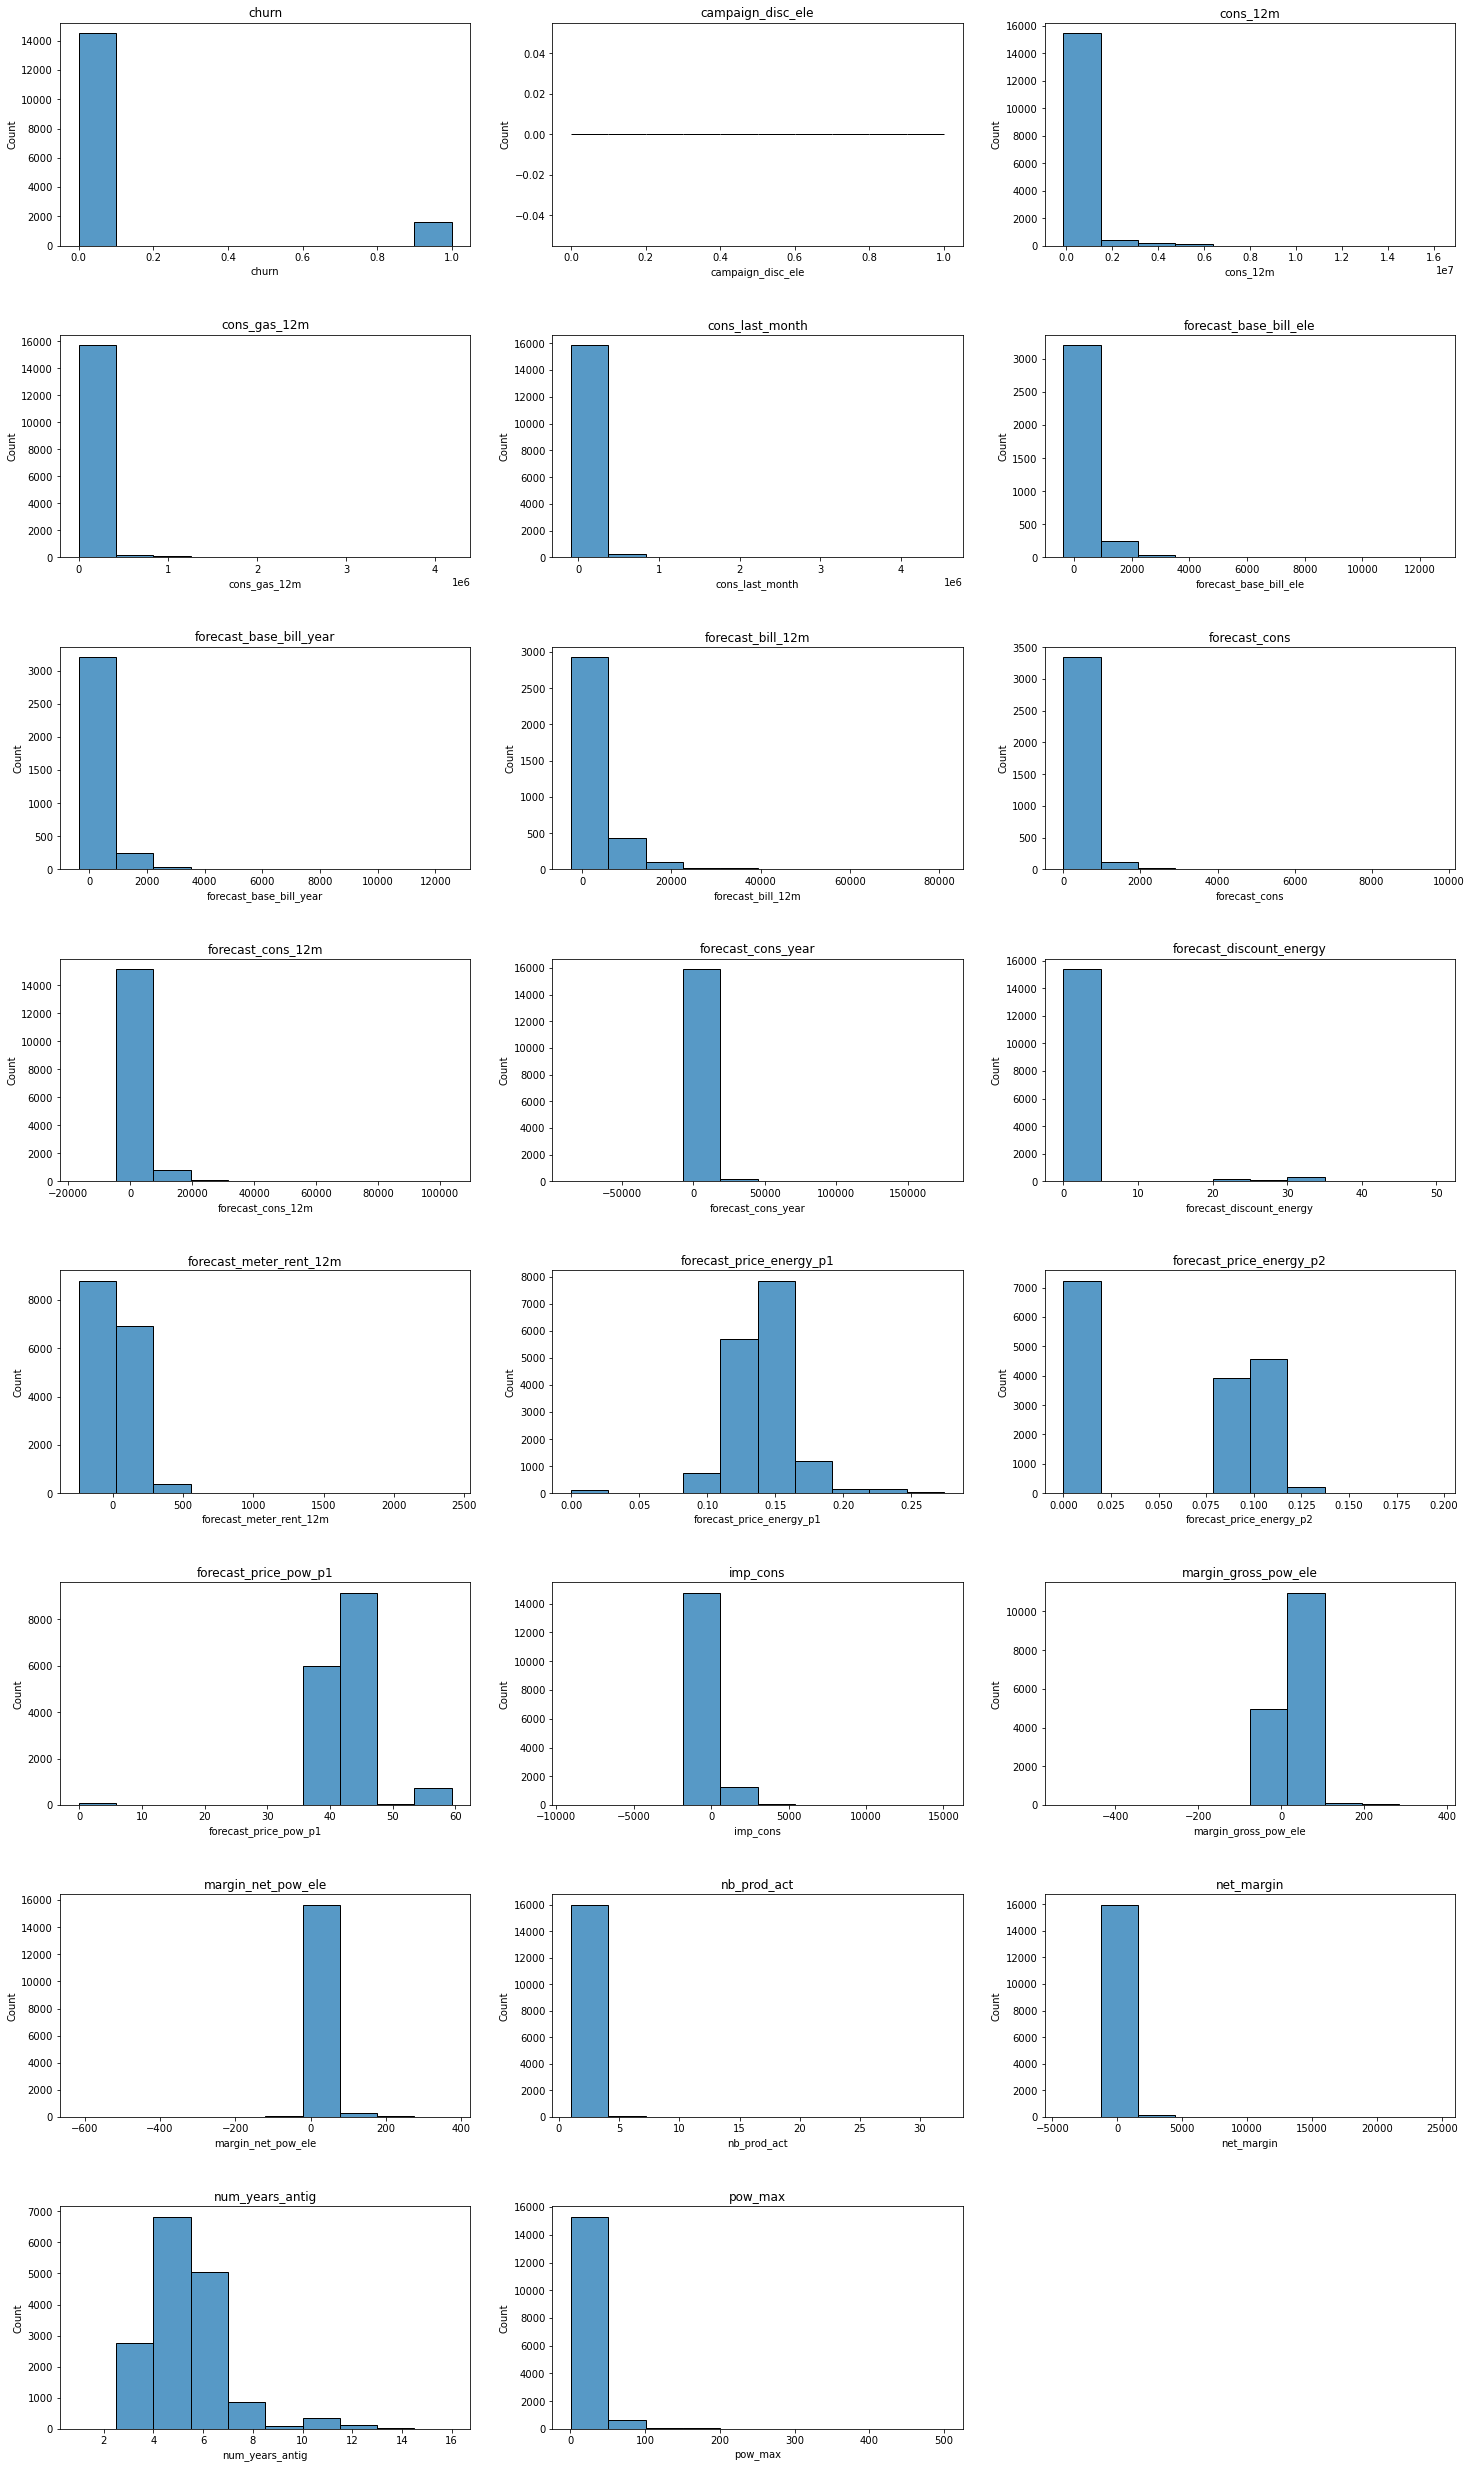

In [16]:
#for numeric variables
gs = GridSpec(9, 3)
plt.figure(figsize = (25, 50))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
for i,colname in enumerate(num_cols):
  ax = plt.subplot(gs[i])
  sns.histplot(train[colname], bins = 10)
  plt.title(colname)

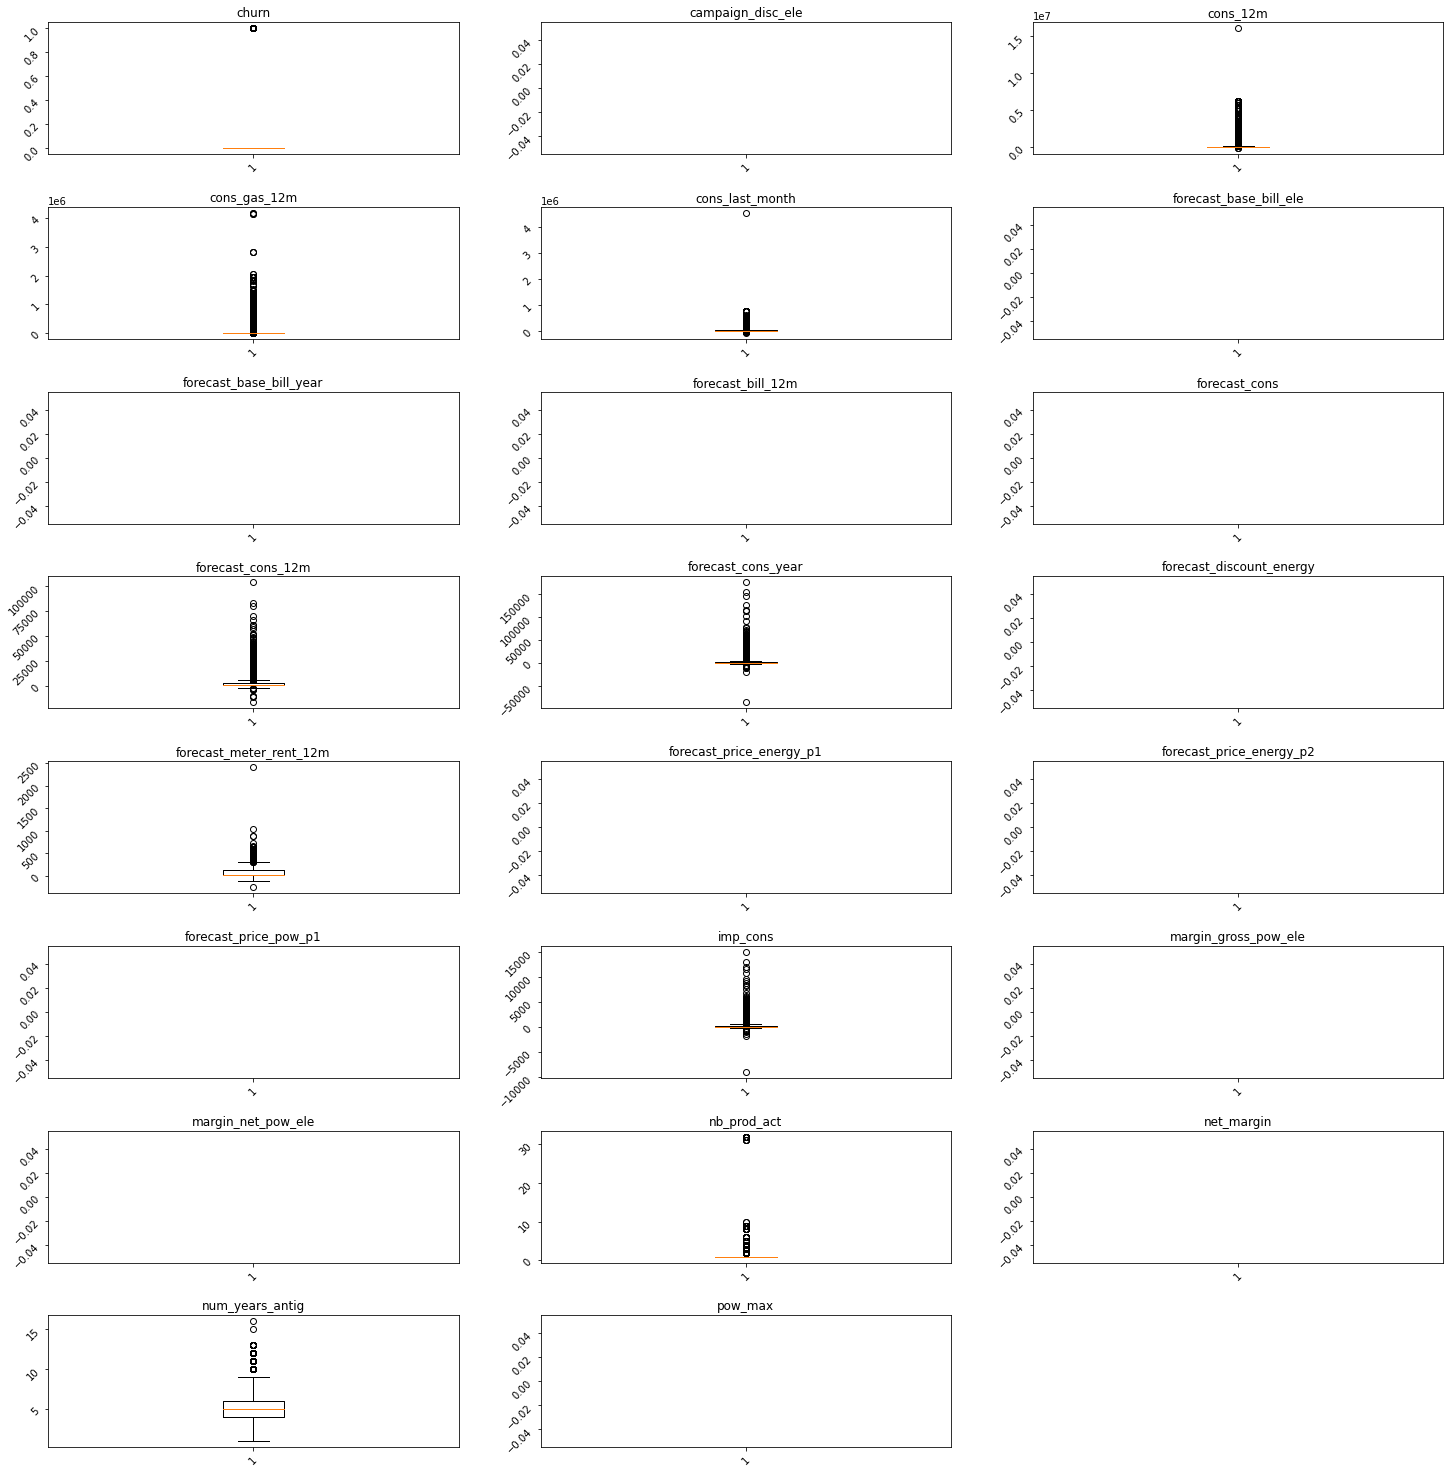

In [47]:
#box plot for detect outlier :
gs = GridSpec(15, 3)
plt.figure(figsize = (25, 50))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
for i,colname in enumerate(num_cols):
  ax = plt.subplot(gs[i])
  plt.boxplot(train[colname])
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.title(colname)

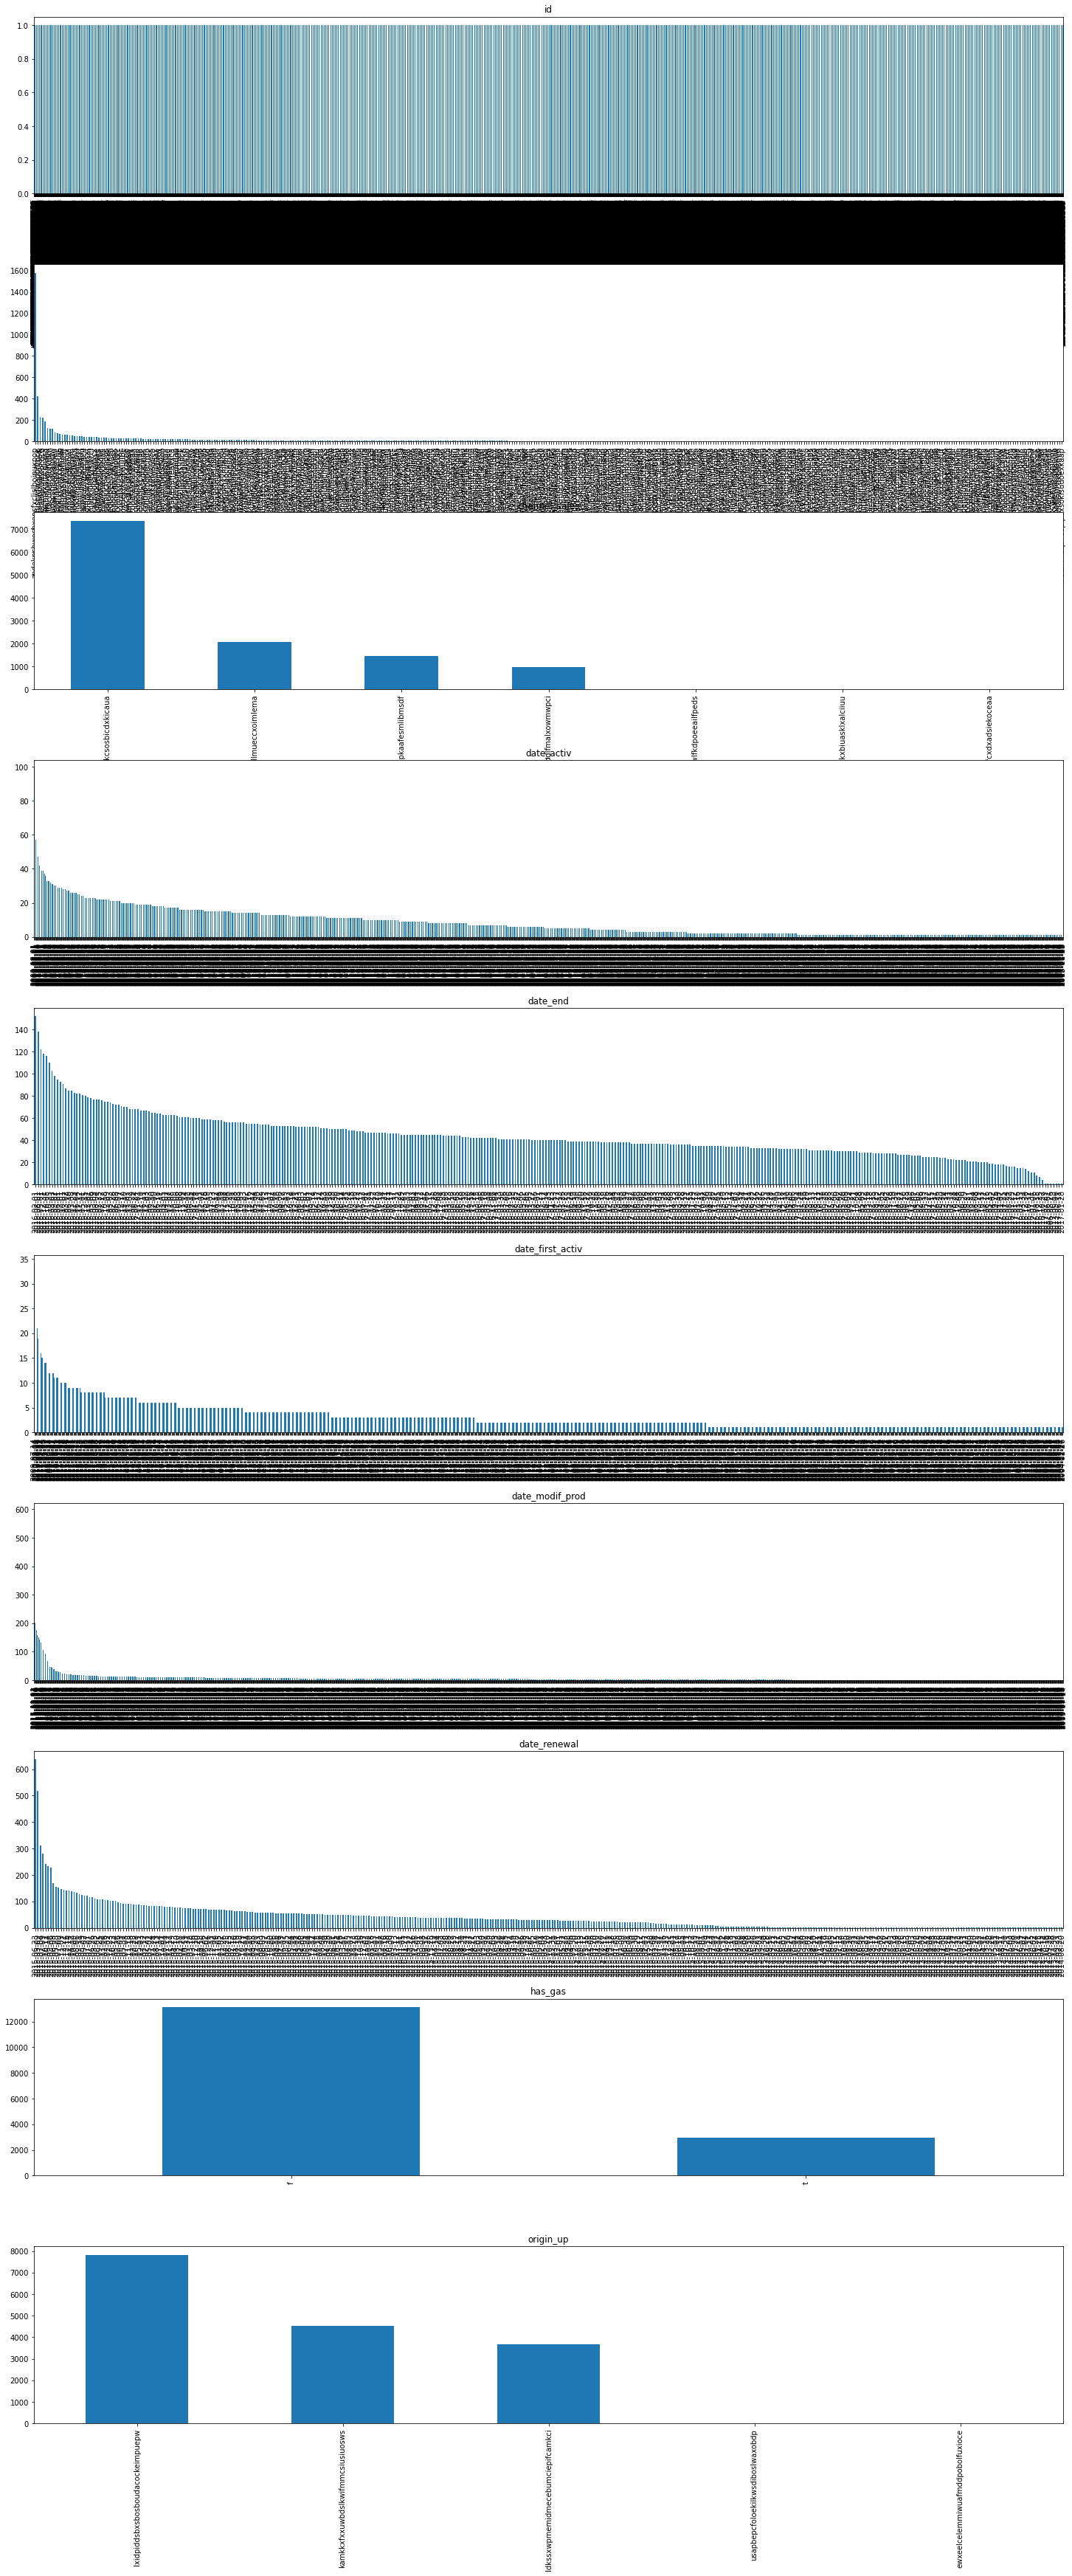

In [18]:
# for categories variable 
gs = GridSpec(10, 1)
plt.figure(figsize = (25, 60))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
for i,colname in enumerate(cat_cols):
  ax = plt.subplot(gs[i])
  train[colname].value_counts().plot.bar()
  plt.title(colname)

In [19]:
#CHURN RATE
churn = train[["id","churn"]]
churn.columns = ["Companies","churn"]
churn_total = churn.groupby(churn["churn"]).count()
churn_total


,Companies
churn,
0,14501
1,1595


In [20]:
churn_percentage = churn_total/churn_total.sum()*100
churn_percentage.transpose()

churn,0,1
Companies,90.090706,9.909294


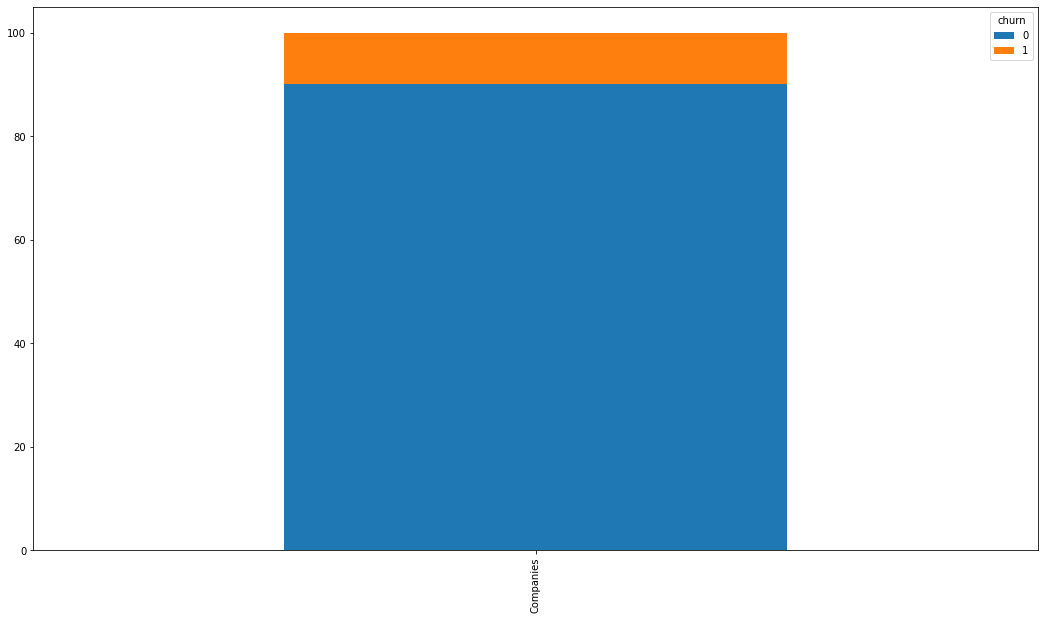

In [21]:
ax = churn_percentage.transpose().plot(kind = "bar", stacked = True, figsize = (18,10))

About 10% of the of total customers have churned.

In [22]:
#correlation
plt.figure(figsize=(20, 16))
correlation = train.corr()
correlation

,churn,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
churn,1.000000,NaN,-0.051759,-0.040880,-0.046931,0.000433,0.000433,0.006909,-0.005247,0.007395,...,-0.003337,0.025597,0.004034,0.003417,0.080158,0.063187,-0.022609,0.029308,-0.071565,0.009456
campaign_disc_ele,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_12m,-0.051759,NaN,1.000000,0.471233,0.919545,0.132991,0.132991,0.149023,0.133147,0.165168,...,-0.033546,0.146758,-0.025418,0.139353,-0.065500,-0.045779,0.308567,0.120491,0.008810,0.102423
cons_gas_12m,-0.040880,NaN,0.471233,1.000000,0.447209,0.085733,0.085733,0.083604,0.076854,0.059525,...,-0.022416,0.078456,-0.027193,0.060609,-0.016867,-0.008242,0.272005,0.058930,-0.008626,0.052365
cons_last_month,-0.046931,NaN,0.919545,0.447209,1.000000,0.136207,0.136207,0.134066,0.136816,0.129574,...,-0.024242,0.123164,-0.020057,0.153861,-0.054114,-0.037696,0.350711,0.096424,0.004860,0.089565
forecast_base_bill_ele,0.000433,NaN,0.132991,0.085733,0.136207,1.000000,1.000000,0.794776,0.964402,0.750961,...,-0.223693,0.351376,0.106436,0.964402,-0.088898,-0.054790,0.051419,0.468836,0.021869,0.585426
forecast_base_bill_year,0.000433,NaN,0.132991,0.085733,0.136207,1.000000,1.000000,0.794776,0.964402,0.750961,...,-0.223693,0.351376,0.106436,0.964402,-0.088898,-0.054790,0.051419,0.468836,0.021869,0.585426
forecast_bill_12m,0.006909,NaN,0.149023,0.083604,0.134066,0.794776,0.794776,1.000000,0.751430,0.970487,...,-0.258372,0.376494,0.147365,0.751430,-0.129388,-0.086826,0.050683,0.656937,0.029917,0.711502
forecast_cons,-0.005247,NaN,0.133147,0.076854,0.136816,0.964402,0.964402,0.751430,1.000000,0.758825,...,-0.166692,0.290593,0.074713,1.000000,-0.111186,-0.075863,0.055135,0.489346,0.006925,0.457566
forecast_cons_12m,0.007395,NaN,0.165168,0.059525,0.129574,0.750961,0.750961,0.970487,0.758825,1.000000,...,-0.217315,0.245845,0.058169,0.725550,-0.184179,-0.141642,0.013283,0.768871,0.064431,0.583119


<Figure size 1440x1152 with 0 Axes>

None of numeric variables correlated significant to churn rate, so we plotting the relationship between categorical variable to the label (churn)


In [23]:
#ACTIVITY
activity = train[["id","activity_new", "churn"]]
activity = activity.groupby("activity_new")["churn"].value_counts().unstack(level=1).sort_values(by=[0], ascending=False)
activity

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0
kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0
kwuslieomapmswolewpobpplkaooaaew,200.0,30.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0
ckfxocssowaeipxueikxcmaxdmcduxsa,176.0,13.0
...,...,...
opoiuuwdmxdssidluooopfswlkkkcsxf,NaN,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,NaN,2.0
wceaopxmdpccxfmcdpopulcaubcxibuw,NaN,1.0


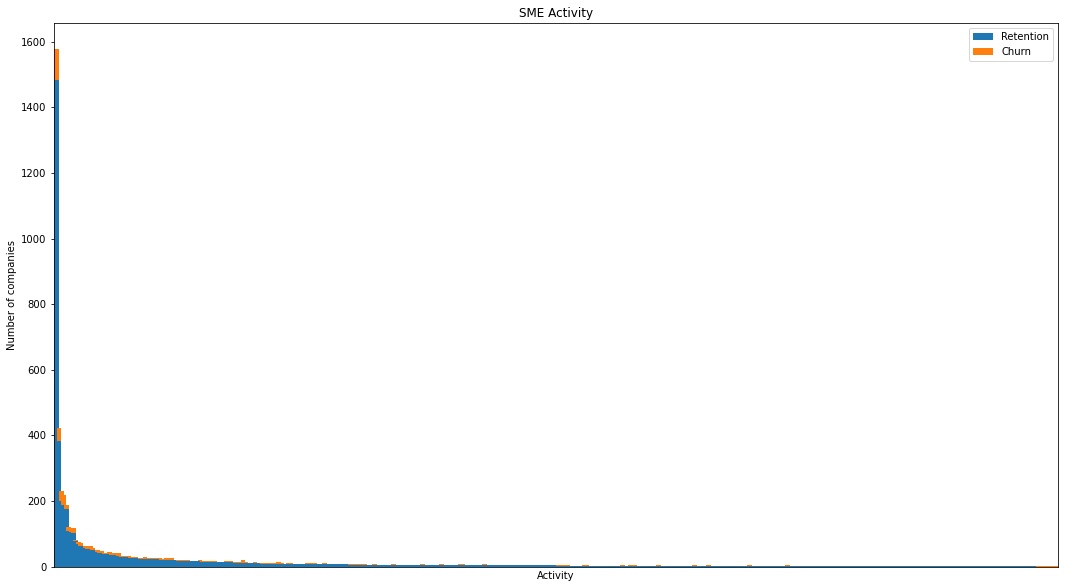

In [65]:
activity.plot(kind="bar",
figsize=(18, 10),
width=2,
stacked=True,
title="SME Activity")
# Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])
plt.show()

With large number of activities and low number of companies belonging to each category.We see churn is not specifically related to any SME activity in particular.

In [73]:
#sale channels
channel = train[["id","channel_sales", "churn"]]
channel = channel.groupby("channel_sales")["churn"].value_counts().unstack(level=1).fillna(0)


<AxesSubplot:xlabel='channel_sales'>

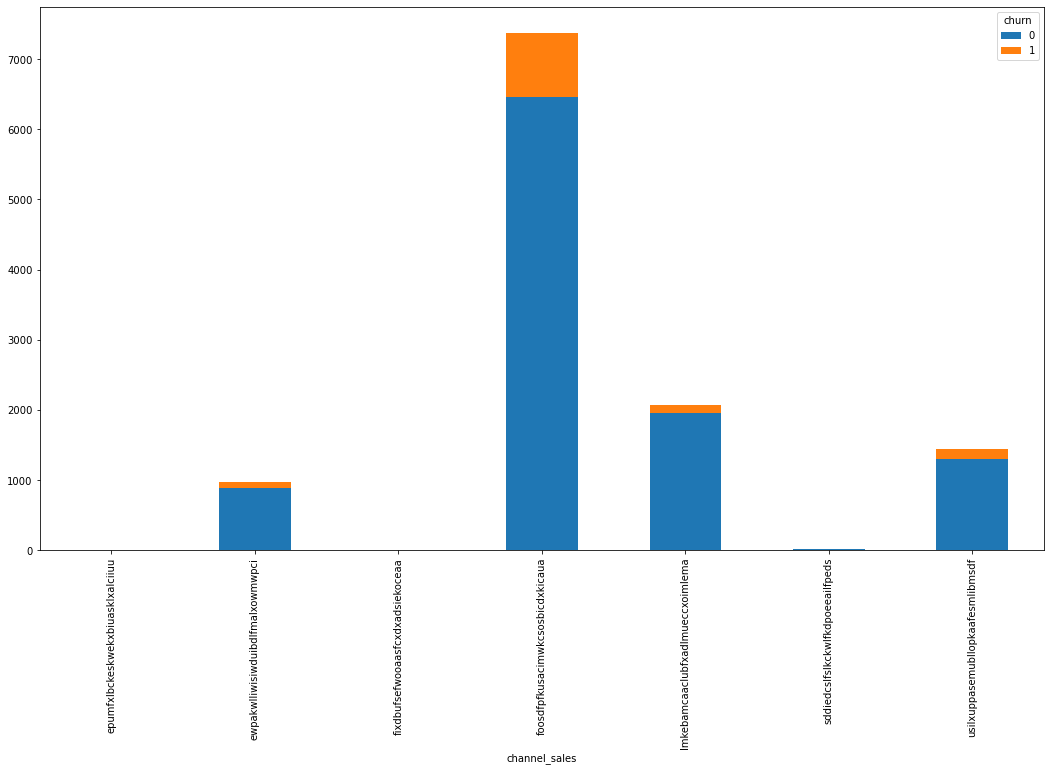

In [74]:
channel.plot(kind = "bar", stacked = True, figsize = (18,10))

In [27]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage = channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage": channel_percentage,
"Total companies": channel_total }).sort_values(by="Churn percentage",
ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


In [28]:
#consumption
consumption = train[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]


In [29]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

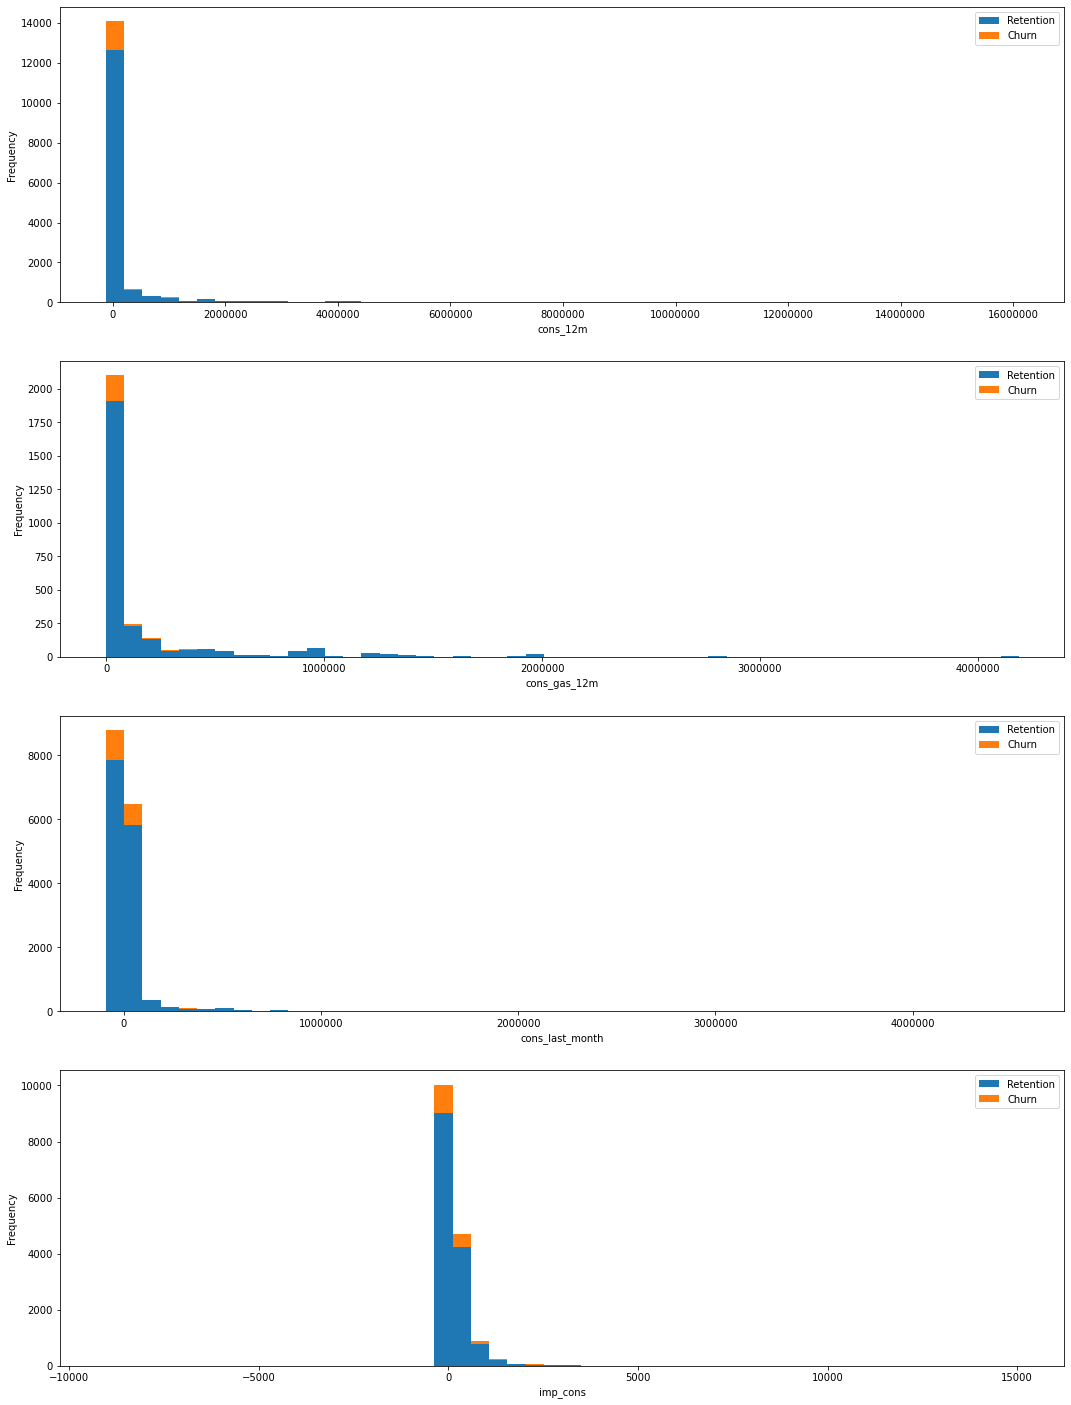

In [30]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] == "t"], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

Those variables histogram, together with box plot before, show that this variables (cons_12m,cons_gas_12m, imp_cons, cons_last_month) have outlier, which need to be exclude from data

# DATA CLEANING, MOVING DUPLICATES, OUTLIERS AND FORMATTING

Description for remove outlier

For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
all(axis=1) ensures that for each row, all column satisfy the constraint.
Finally, the result of this condition is used to index the dataframe
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

In [125]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [126]:
train = remove_outlier(train,'cons_12m')
train

,id,churn,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
1,24011ae4ebbe3035111d65fa7c15bc57,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,0,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,0,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
6,149d57cf92fc41cf94415803a877cb4b,0,NaN,NaN,NaN,4425,0,526,2010-01-13,2016-03-07,...,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [85]:
# def make_mask(df, column):
#     standardized = (df[column] - df[column].mean())/df[column].std()
#     outlier = standardized.abs() >= 2
#     return standardized.abs() >= 2

In [127]:
train = remove_outlier(train,'cons_last_month')
train

,id,churn,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
1,24011ae4ebbe3035111d65fa7c15bc57,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,0,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,0,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
6,149d57cf92fc41cf94415803a877cb4b,0,NaN,NaN,NaN,4425,0,526,2010-01-13,2016-03-07,...,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [76]:
#DUPLICATE
train[train.duplicated()]

,id,churn,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max


In [129]:
train[missing_data[missing_data['Percentage missing value']>60.0].index]

,forecast_bill_12m,forecast_base_bill_year,forecast_base_bill_ele,date_first_activ,forecast_cons,campaign_disc_ele
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
16091,NaN,NaN,NaN,NaN,NaN,NaN
16092,1254.65,68.64,68.64,2012-08-27,15.94,NaN
16093,NaN,NaN,NaN,NaN,NaN,NaN
16094,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
data_train = train.drop((missing_data[missing_data['Percentage missing value']>60.0]).index,axis = 1)
data_train

,id,churn,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
1,24011ae4ebbe3035111d65fa7c15bc57,1,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,0,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,0,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,0,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
6,149d57cf92fc41cf94415803a877cb4b,0,NaN,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,...,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,1,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,0,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [131]:
train.loc[train["date_modif_prod"].isnull(),"date_modif_prod"]

1        NaN
243      NaN
585      NaN
737      NaN
1206     NaN
        ... 
15661    NaN
15742    NaN
15849    NaN
15890    NaN
15900    NaN
Name: date_modif_prod, Length: 113, dtype: object

In [132]:
train["date_modif_prod"].value_counts()

2015-11-01    561
2015-05-24    231
2015-12-17    184
2015-11-18    163
2015-09-20    161
             ... 
2010-12-04      1
2009-02-25      1
2004-04-12      1
2013-01-05      1
2011-06-04      1
Name: date_modif_prod, Length: 2058, dtype: int64

 we will replace the missing values with the median (the most frequent date). For numerical values, the built-in function .median()
can be used, but this will not work for dates or strings, so we will use a workaround using .value counts()

In [133]:
train.loc[train["date_modif_prod"].isnull(),"date_modif_prod"] = train["date_modif_prod"].value_counts().index[0]
train.loc[train["date_end"].isnull(),"date_end"] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(),"date_renewal"] = train["date_renewal"].value_counts().index[0]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


replace negative/ null value with median

In [134]:
hist_data.loc[hist_data["price_p1_var"].isnull(),"price_p1_var"] = hist_data["price_p1_var"].median()
hist_data.loc[hist_data["price_p2_var"].isnull(),"price_p2_var"] = hist_data["price_p2_var"].median()
hist_data.loc[hist_data["price_p3_var"].isnull(),"price_p3_var"] = hist_data["price_p3_var"].median()
hist_data.loc[hist_data["price_p1_fix"].isnull(),"price_p1_fix"] = hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"].isnull(),"price_p2_fix"] = hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"].isnull(),"price_p3_fix"] = hist_data["price_p3_fix"].median()

format dates to datetime 

In [135]:
train["date_activ"] = pd.to_datetime(train["date_activ"], format='%Y-%m-%d')
train["date_end"] = pd.to_datetime(train["date_end"], format='%Y-%m-%d')
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"], format='%Y-%m-%d')
train["date_renewal"] = pd.to_datetime(train["date_renewal"], format='%Y-%m-%d')

<ipython-input-135-63d83578e9b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["date_activ"] = pd.to_datetime(train["date_activ"], format='%Y-%m-%d')
<ipython-input-135-63d83578e9b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["date_end"] = pd.to_datetime(train["date_end"], format='%Y-%m-%d')
<ipython-input-135-63d83578e9b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [136]:
hist_data["price_date"] = pd.to_datetime(hist_data["price_date"], format='%Y-%m-%d')

In [137]:
hist_data.loc[hist_data["price_p1_fix"] < 0,"price_p1_fix"] = hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"] < 0,"price_p2_fix"] = hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"] < 0,"price_p3_fix"] = hist_data["price_p3_fix"].median()

In [138]:
train

,id,churn,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
1,24011ae4ebbe3035111d65fa7c15bc57,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,0,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,0,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
6,149d57cf92fc41cf94415803a877cb4b,0,NaN,NaN,NaN,4425,0,526,2010-01-13,2016-03-07,...,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [139]:
train_data = train.to_csv('train.csv', index = True)
hist_data = train.to_csv('hist.csv', index = True)